In [1]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt

In [2]:
X, y = make_classification(n_samples = 9000, n_features = 18, n_redundant = 12, n_informative = 4, random_state = 42)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [4]:
values = [i for i in range(1,21)]

In [5]:
train_score, test_score = [],[]

In [6]:
for i in values:
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(X_train, y_train)
    train_yhat = model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    test_yhat = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    train_score.append(train_acc)
    test_score.append(test_acc)
    print(f">{i} Train : {train_acc: .3f} , Test : {test_acc: .3f}")

>1 Train :  0.725 , Test :  0.720
>2 Train :  0.757 , Test :  0.751
>3 Train :  0.842 , Test :  0.850
>4 Train :  0.861 , Test :  0.866
>5 Train :  0.869 , Test :  0.871
>6 Train :  0.877 , Test :  0.874
>7 Train :  0.903 , Test :  0.896
>8 Train :  0.925 , Test :  0.902
>9 Train :  0.944 , Test :  0.911
>10 Train :  0.949 , Test :  0.914
>11 Train :  0.959 , Test :  0.916
>12 Train :  0.965 , Test :  0.913
>13 Train :  0.972 , Test :  0.915
>14 Train :  0.978 , Test :  0.920
>15 Train :  0.983 , Test :  0.917
>16 Train :  0.987 , Test :  0.923
>17 Train :  0.991 , Test :  0.917
>18 Train :  0.994 , Test :  0.921
>19 Train :  0.996 , Test :  0.925
>20 Train :  0.997 , Test :  0.922


Text(0.5, 1.0, 'Detecting Overfitting and Underfitting')

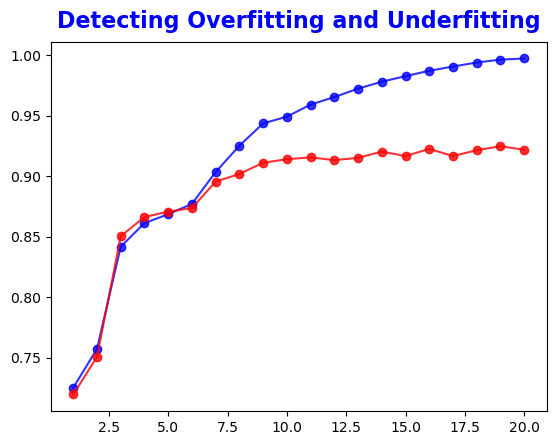

In [7]:
plt.plot(values, train_score, 'bo-', label='Train', alpha = 0.8)
plt.plot(values, test_score, 'ro-', label='Test', alpha = 0.8)
plt.title('Detecting Overfitting and Underfitting', pad=10, fontsize = 16, fontweight = 'bold', color = "Blue")

In [8]:
from sklearn.model_selection import GridSearchCV

In [9]:
param_grid = {
    'criterion': ['gini', 'entropy'],        # Different ways of measuring the quality of a split
    'max_depth': [2, 4, 6, 10, 20],           # Maximum depth of the tree (controls overfitting)
    'min_samples_split': [5, 10, 20, 50, 100] # Minimum samples required to split a node
}

In [10]:
clf = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=3, n_jobs=-1, scoring='accuracy')
clf.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 10, 20],
                         'min_samples_split': [5, 10, 20, 50, 100]},
             scoring='accuracy')

In [11]:
print(accuracy_score(y_train, clf.best_estimator_.predict(X_train)))
print(accuracy_score(y_test, clf.best_estimator_.predict(X_test)))

0.97
0.922962962962963
